<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/Turma08/LabFis4Espectroscopia_Turma8_g1_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV Prática 08 -09 : Espectrocopia I e II

In [2]:
# Fonte - ex.: Mercurio - Hg
Theta_ref1 =352.0 #graus - espectroscopio 1
#Theta_ref2 =347 #graus - espectroscopio 2
#Theta_ref3 =256 #graus - espectroscopio 3


In [3]:
#Alinhamento
x_d_1=359.8
x_e_1=344.4

#x_d_2=339.7
#x_e_2=354.4

#x_d_3=263.5
#x_e_3=248.6

theta_i_d_1 = abs(Theta_ref1-x_d_1)
theta_i_e_1 = abs(Theta_ref1-x_e_1)
a_esp1=abs(theta_i_d_1-theta_i_e_1)
print("theta_i_d_1:", theta_i_d_1,"; ","theta_i_e_1:",  np.round(theta_i_e_1,1),"; ","Alinhamento do Esp. 1:",  np.round(a_esp1, 2 ),".")

#theta_i_d_2 = abs(Theta_ref2-x_d_2)
#theta_i_e_2 = abs(Theta_ref2-x_e_2)
#a_esp2=abs(theta_i_d_2-theta_i_e_2)
#print("theta_i_d_2:", np.round(theta_i_d_2,1),"; ","theta_i_e_2:",  np.round(theta_i_e_2,1),"; ","Alinhamento do Esp. 2:",  np.round(a_esp2, 2 ),".")

#theta_i_d_3 = abs(Theta_ref3-x_d_3)
#theta_i_e_3 = abs(Theta_ref3-x_e_3)
#a_esp3=abs(theta_i_d_3-theta_i_e_3)
#print("theta_i_d_3:", theta_i_d_3,"; ","theta_i_e_3:", np.round(theta_i_e_3,1),"; ","Alinhamento do Esp. 3:",  np.round(a_esp3, 2 ),".")

theta_i_d_1: 7.800000000000011 ;  theta_i_e_1: 7.6 ;  Alinhamento do Esp. 1: 0.2 .


In [4]:
!curl -o espectroscopio123turma8-g1.csv https://raw.githubusercontent.com/elizamelo/LabFis04/main/Grupos/espectroscopio123%20-%20turma8-g1.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   219  100   219    0     0    761      0 --:--:-- --:--:-- --:--:--   763


In [5]:


dataset = pd.read_csv( "espectroscopio123turma8-g1.csv", usecols=[0,1,2], nrows=10,skiprows=1, na_values=["0"],names=["A", "X", "Y"] )
dataset



,A,X,Y
0,7.5,0.130526,4358.3
1,7.6,0.132256,4471.0
2,8.5,0.147809,5015.0
3,9.4,0.163326,5460.7
4,10.0,0.173648,5769.6
5,10.2,0.177085,5790.7
6,10.0,0.173648,5876.0
7,11.2,0.194234,6678.0
8,12.0,0.207912,7065.0


In [6]:
dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [7]:
dataset['X'] = pd.to_numeric(dataset['X'], errors='coerce')
dataset['Y'] = pd.to_numeric(dataset['Y'], errors='coerce')

dataset.dtypes

A    float64
X    float64
Y    float64
dtype: object

In [8]:

#xdata=dataset['X'] # sen(theta)
#ydata=dataset['Y'] # Comprimento de onda (Angtrom)
x = dataset[ "X" ] # sen(theta)
x

0    0.130526
1    0.132256
2    0.147809
3    0.163326
4    0.173648
5    0.177085
6    0.173648
7    0.194234
8    0.207912
Name: X, dtype: float64

In [9]:
y = dataset[ "Y" ] #Comprimento de onda em Angstrom
y

0    4358.3
1    4471.0
2    5015.0
3    5460.7
4    5769.6
5    5790.7
6    5876.0
7    6678.0
8    7065.0
Name: Y, dtype: float64

In [10]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x




In [11]:
popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[ -138.60423799 34477.59492568] [[  44381.759782   -260459.76042494]
 [-260459.76042494 1562294.90664226]]


In [12]:
print ( "Coeficiente m' (m): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (m): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (m)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m' (m): 34477.59492567939
Incerteza padrão coeficiente m (m): 1249.9179599646768
a = 34477.59 ± 1249.92 (m)


In [13]:
print ( "Coeficiente b (m): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (m): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (m)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (m): -138.60423799068388
Incerteza padrão coeficiente b (m): 210.66978848900035
-138.6 ± 210.67 (m)


Text(0.4, 0.85, '$b = -138.6 \\pm 210.67\\,\\left(\\rm{m}\\right)$')

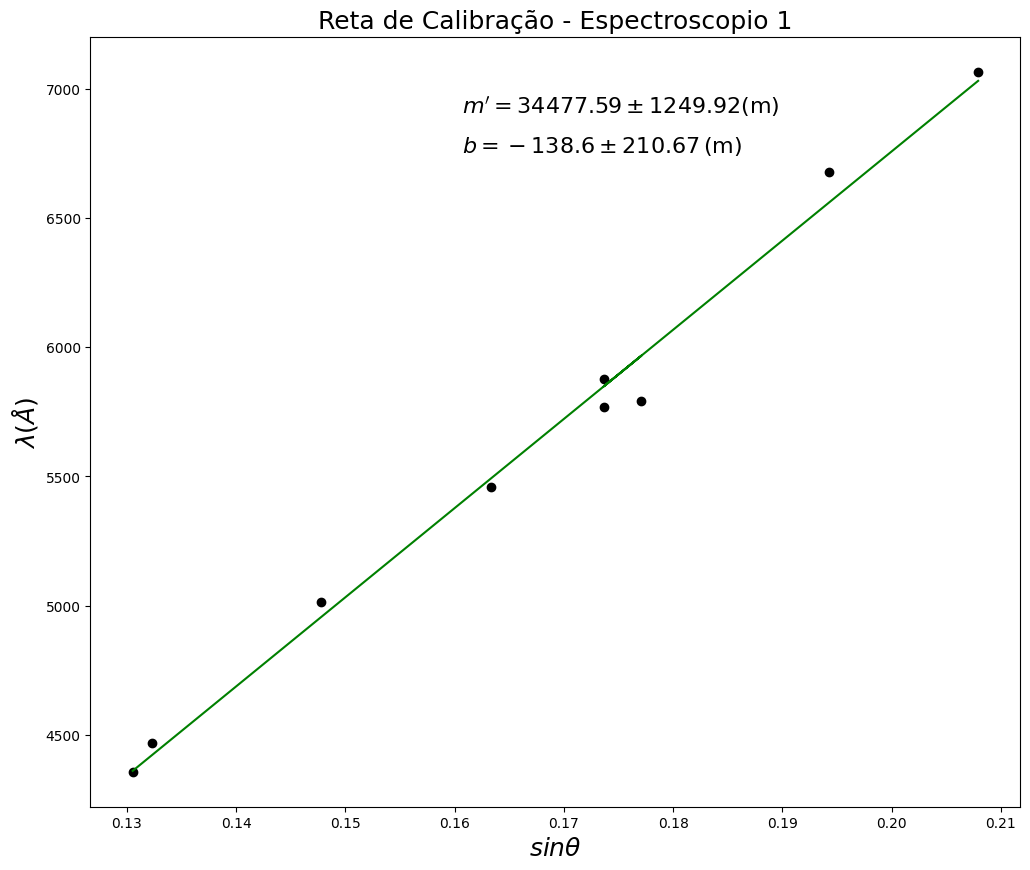

In [14]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-g' )
plt.xlabel( r"$sin\theta$", fontsize=18)
plt.ylabel( r"$\lambda(\AA)$", fontsize=18 )
plt.title('Reta de Calibração - Espectroscopio 1', fontsize=18)

plt.text( 0.4, 0.9,
          r"$m' = {} \pm {}(\rm{{m}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{m}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

In [15]:
d=1e-3/300 #m
d

3.3333333333333333e-06

In [16]:
coefa=popt_lin[ 1 ] #Angstrom
coefa*1e-10

3.4477594925679393e-06

In [17]:
D= np.abs(d-(coefa*1e-10))/(np.sqrt( pcov_lin[ 1, 1 ]*1e-10))
D

9.154693579876208e-06

Lâmpada de Hidrogênio - espectro visível

Determinar a constante de Rydberg

d=1e-3/300 m

m=1

lambda=d/m *sen(theta)

In [18]:
R_H=1.097e-3 #A
R_H

0.001097

In [19]:
R_H=1.097e-3 #A
R_H

0.001097

In [45]:
thetag_1=7.4 #violeta 2
thetag_2=8.3 #azul-esverdeada
thetag_3=11.2 #vermelha
print("\u03B8_1 =", thetag_1,"\u00B0")
print("\u03B8_2 =", thetag_2,"\u00B0")
print("\u03B8_3 =", thetag_3,"\u00B0")

θ_1 = 7.4 °
θ_2 = 8.3 °
θ_3 = 11.2 °


In [46]:
thetar_1= np.deg2rad(thetag_1)#violeta 2
thetar_2= np.deg2rad(thetag_2) #azul-esverdeada
thetar_3= np.deg2rad(thetag_3) #vermelha
print("\u03B8_1 =", thetar_1,"rad")
print("\u03B8_2 =", thetar_2,"rad")
print("\u03B8_3 =", thetar_3,"rad")

θ_1 = 0.1291543646475804 rad
θ_2 = 0.14486232791552936 rad
θ_3 = 0.1954768762233649 rad


In [47]:
or1=((np.sin(thetar_1)) )
or2=((np.sin(thetar_2)) )
or3=((np.sin(thetar_3)) )
print("sen\u03B8_1 =",or1 ,"rad")
print("sen\u03B8_2 =",or2 ,"rad")
print("sen\u03B8_3 =",or3 ,"rad")
o1=np.rad2deg(or1)
o2=np.rad2deg(or2)
o3=np.rad2deg(or3)
print("\u03B8_1 =", o1,"\u00B0")
print("\u03B8_2 =", o2,"\u00B0")
print("\u03B8_3 =", o3,"\u00B0")

senθ_1 = 0.1287955965775628 rad
senθ_2 = 0.1443562010009732 rad
senθ_3 = 0.19423435121997196 rad
θ_1 = 7.379444103763937 °
θ_2 = 8.271001063897955 °
θ_3 = 11.128808561366105 °


In [48]:
l_1=(d * or1)
l_1

4.2931865525854265e-07

In [49]:
l_2=(d * or2)
l_2

4.811873366699107e-07

In [50]:
l_3=(d * or3)
l_3

6.474478373999065e-07

In [51]:
y1=1/l_1
y2=1/l_2
y3=1/l_3
print(y1,";",y2,";",y3,";")

2329272.179886485 ; 2078192.6783871064 ; 1544525.9714140245 ;


In [52]:
x1=(1/4)-(1/25)
x2=(1/4)-(1/16)
x3=(1/4)-(1/9)
print(x1,";",x2,";",x3,";")

0.21 ; 0.1875 ; 0.1388888888888889 ;


In [53]:
x_h=np.array([x1,x2,x3]) # sen(theta)
y_h=np.array([y1,y2,y3] )# Comprimento de onda (Angtrom)

In [54]:
xhbar = np.mean(x_h) # cálculo da média de x_h
yhbar = np.mean(y_h)  # cálculo da média de y_h


a_h = np.sum(x_h*(y_h-yhbar))/np.sum(x_h*(x_h-xhbar)) #coef. angular estimado
b_h = yhbar - a_h*xhbar #coeficiente linear estimado


yhest = a_h*x_h + b_h # função estimada

Rh_squared = np.sum((yhest-yhbar)**2)/np.sum((y_h-yhbar)**2) #coef. de determinação
print("coef. angular (a_h): ", np.round(a_h*1e-7,2),"1e7/m")
print("coeficiente linear (b_h): ", np.round(b_h,2))
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))

coef. angular (a_h):  1.1 1e7/m
coeficiente linear (b_h):  12529.55
Equação da reta: y_h= 11026332.37 *x_h + 12529.55


Equação da reta: y_h= 11026332.37 *x_h + 12529.55


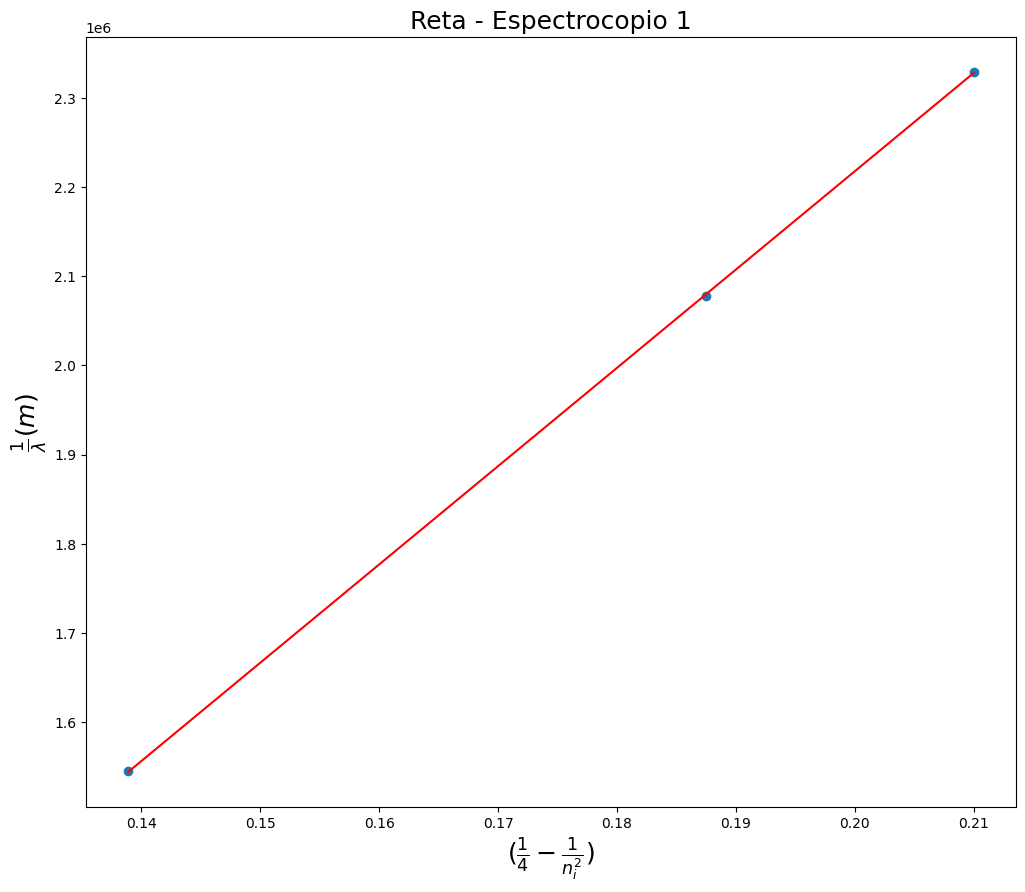

In [55]:
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))
plt.figure(figsize=(12,10))
plt.plot(x_h, yhest, 'r', label = "fitted curve")
plt.scatter(x_h, y_h, label = "data")
plt.xlabel(r'$(\frac{1}{4}-\frac{1}{n_{i}^{2}})$',fontsize=18 )
plt.ylabel(r'$\frac{1}{\lambda}(m)$',fontsize=18  )
plt.title('Reta - Espectrocopio 1',fontsize=18 )
plt.show()

In [56]:
lambda_1=(3.44e-6*or1-13.86e-9)
lambda_1

4.29196852226816e-07

In [57]:
lambda_2=(3.44e-6*or2-13.86e-9)
lambda_2

4.827253314433478e-07

In [59]:
lambda_3=(3.44e-6*or3-13.86e-9)
lambda_3

6.543061681967035e-07

In [60]:
y_1=1/lambda_1
y_2=1/lambda_2
y_3=1/lambda_3
print(y_1,";",y_2,";",y_3,";")

2329933.2108603953 ; 2071571.4193203866 ; 1528336.5014822402 ;


In [61]:
x_x=np.array([x1,x2,x3]) # sen(theta)
y_y=np.array([y_1,y_2,y_3] )# Comprimento de onda (Angtrom)

In [62]:
xxbar = np.mean(x_x) # cálculo da média de x_h
yybar = np.mean(y_y)  # cálculo da média de y_h


a_r = np.sum(x_h*(y_y-yybar))/np.sum(x_x*(x_x-xxbar)) #coef. angular estimado
b_r = yybar - a_r*xxbar #coeficiente linear estimado


yrest = a_r*x_x + b_r # função estimada

Rr_squared = np.sum((yrest-yybar)**2)/np.sum((y_y-yybar)**2) #coef. de determinação
print("coef. angular (a_h): ", np.round(a_r*1e-7,2),"1e7/m")
print("coeficiente linear (b_h): ", np.round(b_r,2))
print("Equação da reta: y_h=",np.round(a_r,2),"*x_x +", np.round(b_r,2))

coef. angular (a_h):  1.13 1e7/m
coeficiente linear (b_h):  -36072.3
Equação da reta: y_h= 11256866.34 *x_x + -36072.3


Equação da reta: y_h= 11256866.34 *x_h + -36072.3


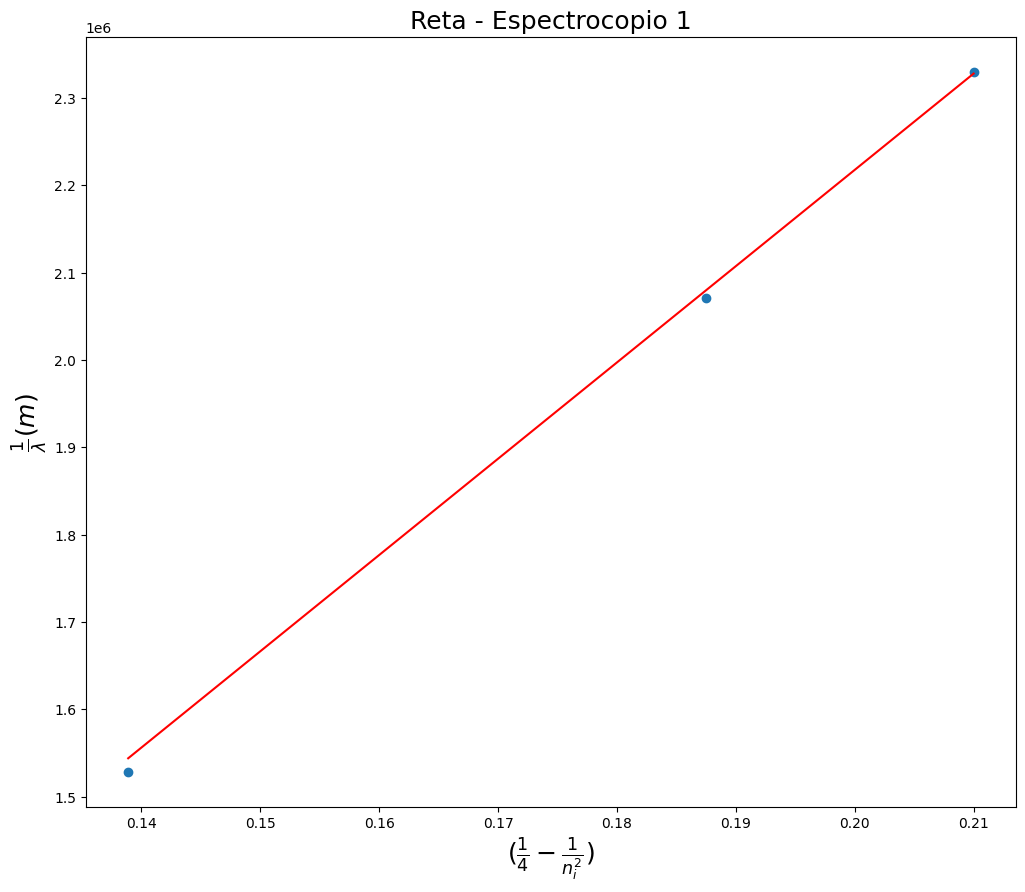

In [63]:
print("Equação da reta: y_h=",np.round(a_r,2),"*x_h +", np.round(b_r,2))
plt.figure(figsize=(12,10))
plt.plot(x_x, yhest, 'r', label = "fitted curve")
plt.scatter(x_x, y_y, label = "data")
plt.xlabel(r'$(\frac{1}{4}-\frac{1}{n_{i}^{2}})$',fontsize=18 )
plt.ylabel(r'$\frac{1}{\lambda}(m)$',fontsize=18  )
plt.title('Reta - Espectrocopio 1',fontsize=18 )
plt.show()